In [1]:
import sympy
import math 
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Interacting Holographic Dark Energy Model (IHDE)
### For the holographic dark energy model with the dark matter interaction, the evolution of the 
### the density parameter is given by 
$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{Q \Omega_{de}}{(1+z)H\rho_c} - \frac{3 \Omega_{de} \Omega_{ls} \omega_{ls}}{z+1} \,
$$
### We consider a Universe dominated by the dark matter, dark energy, radiation and barionic matter, i.e. 
$$
\Omega_{de} + \Omega_{cdm} + \Omega_{b} + \Omega_r = 1
$$
### Using the form for the interaction paramter (https://iopscience.iop.org/article/10.1088/1475-7516/2012/06/009) 
$$
Q = \Gamma H \frac{\rho_{de}^{\beta} \rho_{dm}^{\alpha} }{\rho_{c}^{\alpha + \beta -1}} = \Gamma H \rho_{c} \Omega_{de}^{\beta} \Omega_{dm}^{\alpha}
$$

### The density equation in this case is 
$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{\Gamma \Omega_{de}^{\beta +1} \Omega_{dm}^{\alpha}}{(1+z)} - \frac{3 \Omega_{de} \Omega_{r} \omega_{r}}{z+1} \,
$$
### where $\Omega_{r} = \Omega_{r0}(z+1)^4$ and $\omega_r = 1/3$. 
### 

$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{\Gamma \Omega_{de}^{\beta +1} (1-\Omega_{de} -  \Omega_{b} - \Omega_r )^{\alpha}}{(1+z)} -  \Omega_{de} \Omega_{r0}(z+1)^3 \,
$$

In [5]:
alpha = [0.999,1.0,1.01,1.0001]
beta  = [0.5,1,5,2,10]
Gamma = [0.5,1,2.5,10,20] 
c =  [0.8,1.0,1.5,1.8,2.0]
Omega_r0 = 0.0001
Omega_b0 = 0.3


def zhang_model1 (Omega,z):
    Omegab = Omega_b0*(1+z)**3
    Omegar = Omega_r0*(1+z)**4
    for i in c:
              dOmdz = (Omega*(Omega-1)/(z+1))*((2*(np.sqrt(Omega)))/i + 1) + (Gamma[0]*Omega**(beta[0]+1))*((1 - Omega - Omegab - Omegar)**alpha[1])/(1+z) - Omega*Omega_r0*(z+1)**3
    return (dOmdz)    


z_rs = np.linspace(0,3,300)
O_de0 = 0.7
sol = odeint(zhang_model1,O_de0,z_rs)
sol


array([[0.7       ],
       [0.6961292 ],
       [0.69225873],
       [0.68838894],
       [0.68452015],
       [0.68065275],
       [0.67678708],
       [0.67292345],
       [0.6690622 ],
       [0.66520363],
       [0.66134809],
       [0.65749588],
       [0.65364731],
       [0.64980268],
       [0.64596231],
       [0.64212648],
       [0.63829549],
       [0.63446964],
       [0.63064919],
       [0.62683444],
       [0.62302566],
       [0.61922312],
       [0.61542709],
       [0.61163784],
       [0.60785562],
       [0.60408069],
       [0.6003133 ],
       [0.59655369],
       [0.59280212],
       [0.58905882],
       [0.58532401],
       [0.58159795],
       [0.57788084],
       [0.57417292],
       [0.5704744 ],
       [0.5667855 ],
       [0.56310642],
       [0.55943738],
       [0.55577857],
       [0.5521302 ],
       [0.54849245],
       [0.54486552],
       [0.5412496 ],
       [0.53764487],
       [0.53405151],
       [0.53046969],
       [0.52689958],
       [0.523

In [3]:
import numpy as np
from scipy.integrate import odeint

alpha = [0.999, 1.0, 1.01, 1.0001]
beta = [0.5, 1, 5, 2, 10]
Gamma = [0.5, 1, 2.5, 10, 20]
c = [0.8, 1.0, 1.5, 1.8, 2.0]
Omega_r0 = 0.0001
Omega_b0 = 0.3

def zhang_model1(Omega, z, c_value, beta_value, gamma_value):
    Omegab = Omega_b0 * (1 + z) ** 3
    Omegar = Omega_r0 * (1 + z) ** 4
    dOmdz = (Omega * (Omega - 1) / (z + 1)) * ((2 * (np.sqrt(Omega))) / c_value + 1) + \
            (gamma_value * Omega ** (beta_value + 1)) * ((1 - Omega - Omegab - Omegar) ** alpha[1]) / (1 + z) - \
            Omega * Omega_r0 * (z + 1) ** 3
    return dOmdz

z_rs = np.linspace(0, 3, 300)
O_de0 = 0.7


solutions1 = []
for c_value in c: 
    sol = odeint(zhang_model1, O_de0, z_rs, args=(c_value, beta[0],Gamma[0]))
    solutions1.append(sol)




[array([[0.7       ],
        [0.69348415],
        [0.68696875],
        [0.68045675],
        [0.67395086],
        [0.66745377],
        [0.66096806],
        [0.65449625],
        [0.64804078],
        [0.64160399],
        [0.63518812],
        [0.62879535],
        [0.62242777],
        [0.61608737],
        [0.60977607],
        [0.60349568],
        [0.59724794],
        [0.59103451],
        [0.58485696],
        [0.57871676],
        [0.57261531],
        [0.56655394],
        [0.56053389],
        [0.55455633],
        [0.54862234],
        [0.54273296],
        [0.53688912],
        [0.53109168],
        [0.52534147],
        [0.51963922],
        [0.51398561],
        [0.50838124],
        [0.50282669],
        [0.49732243],
        [0.49186893],
        [0.48646656],
        [0.48111565],
        [0.47581651],
        [0.47056936],
        [0.4653744 ],
        [0.46023178],
        [0.45514161],
        [0.45010396],
        [0.44511887],
        [0.44018632],
        [0

In [64]:

solutions2 = []
for c_value in c: 
    sol2 = odeint(zhang_model1, O_de0, z_rs, args=(c_value, beta[1],Gamma[1]))
    solutions2.append(sol2)


In [65]:

solutions3 = []
for c_value in c: 
    sol3 = odeint(zhang_model1, O_de0, z_rs, args=(c_value, beta[2],Gamma[2]))
    solutions3.append(sol3)

Text(0.5, 1.0, '$ \\alpha = 1$  and $ \\beta= \\Gamma = 0.5 $')

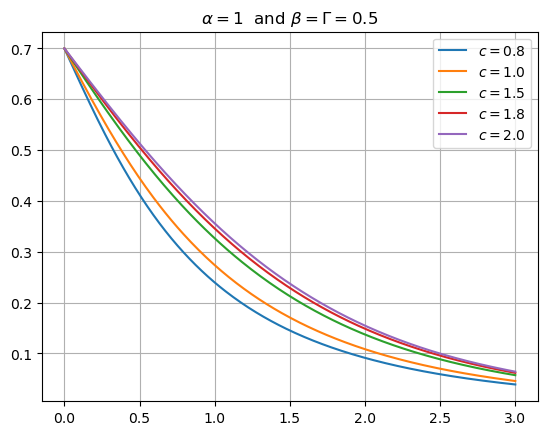

In [66]:
c = [0.8, 1.0, 1.5, 1.8, 2.0]
plt.plot(z_rs,solutions1[0],label='$c = 0.8$')
plt.plot(z_rs,solutions1[1],label='$c = 1.0$')
plt.plot(z_rs,solutions1[2],label='$c = 1.5$')
plt.plot(z_rs,solutions1[3],label='$c = 1.8$')
plt.plot(z_rs,solutions1[4],label='$c = 2.0$')
plt.legend()
plt.grid()
plt.title('$ \\alpha = 1$  and $ \\beta= \\Gamma = 0.5 $')



Text(0.5, 1.0, '$ \\alpha = 1$  and $ \\beta= \\Gamma = 1.0 $')

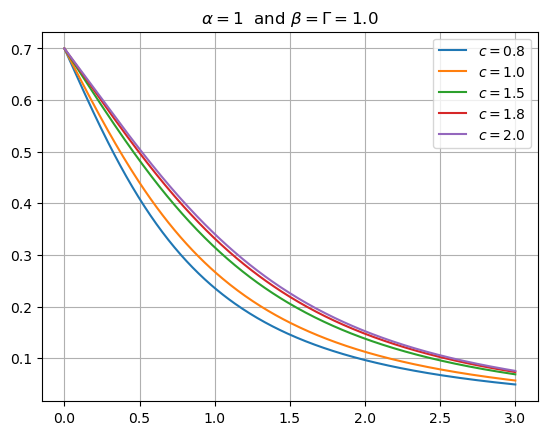

In [67]:
plt.plot(z_rs,solutions2[0],label='$c = 0.8$')
plt.plot(z_rs,solutions2[1],label='$c = 1.0$')
plt.plot(z_rs,solutions2[2],label='$c = 1.5$')
plt.plot(z_rs,solutions2[3],label='$c = 1.8$')
plt.plot(z_rs,solutions2[4],label='$c = 2.0$')
plt.legend()
plt.grid()
plt.title('$ \\alpha = 1$  and $ \\beta= \\Gamma = 1.0 $')

Text(0.5, 1.0, '$ \\alpha = 1$, $ \\beta= 5 $ and $ \\Gamma = 2.5 $')

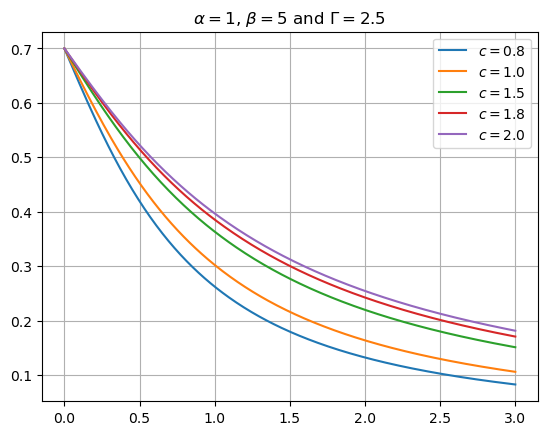

In [68]:
plt.plot(z_rs,solutions3[0],label='$c = 0.8$')
plt.plot(z_rs,solutions3[1],label='$c = 1.0$')
plt.plot(z_rs,solutions3[2],label='$c = 1.5$')
plt.plot(z_rs,solutions3[3],label='$c = 1.8$')
plt.plot(z_rs,solutions3[4],label='$c = 2.0$')
plt.legend()
plt.grid()
plt.title('$ \\alpha = 1$, $ \\beta= 5 $ and $ \\Gamma = 2.5 $')